<h1>Velocity Slices</h1>

In [91]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [92]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [93]:
dnamein='./hdf5/' # directory where the file is located
dnameout='./png/' # directory where the plot will be saved

In [94]:
f = h5py.File('200_512_f32.h5', 'r') # open the hdf5 file for reading
head = f.attrs # read the header attributes into a structure, called head

In [95]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [96]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [97]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [98]:
px  = f['momentum_x'][:]
py = f['momentum_y'][:]
pz = f['momentum_z'][:]
d = f['density'][:]

In [99]:
f.close()

In [100]:
vx = (px*v_c)/d
vy = (py*v_c)/d
vz = (pz*v_c)/d

In [101]:
print("n range = %e %e" % (np.min(vx),np.max(vx)))
print("n range = %e %e" % (np.min(vy),np.max(vy)))
print("n_range = %e %e" % (np.min(vz),np.max(vz)))

n range = -1.715154e+07 1.361097e+08
n range = -6.231418e+07 4.673543e+07
n_range = -5.510395e+07 4.965170e+07


In [102]:
vx_xy = vx[int(nx/2),:,:]
vx_yz = vx[:,int(ny/2),:]
vx_xz = vx[:,:,int(nz/2)]

In [103]:
vy_xy = vy[int(nx/2),:,:]
vy_yz = vy[:,int(ny/2),:]
vy_xz = vy[:,:,int(nz/2)]

In [104]:
vz_xy = vz[int(nx/2),:,:]
vz_yz = vz[:,int(ny/2),:]
vz_xz = vz[:,:,int(nz/2)]

<h3>X-Y Slices</h3>

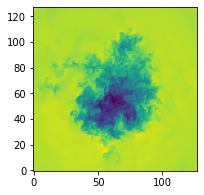

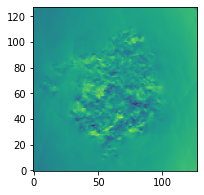

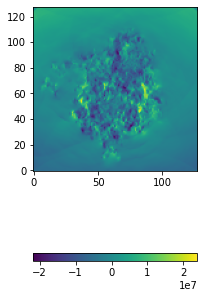

In [131]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
image = plt.imshow(vx_xy.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,2)
image = plt.imshow(vy_xy.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,3)
image = plt.imshow(vz_xy.T, origin='lower', cmap='viridis')

plt.savefig('..\Plots\plot4.png', bbox_inches='tight')
cb = plt.colorbar(image, orientation = 'horizontal')

<h3>Y-Z Slices</h3>

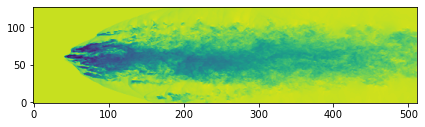

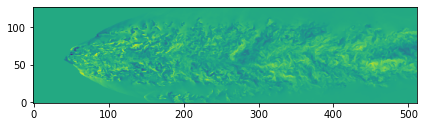

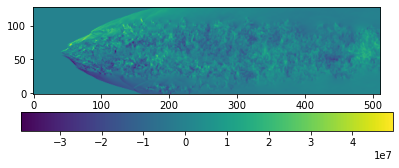

In [132]:
fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,1)
image = plt.imshow(vx_yz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,2)
image = plt.imshow(vy_yz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,3)
image = plt.imshow(vz_yz.T, origin='lower', cmap='viridis')

plt.tight_layout()
plt.savefig('..\Plots\plot5.png', bbox_inches='tight')
cb = plt.colorbar(image, orientation = 'horizontal')

<h3>X-Z Slices</h3>

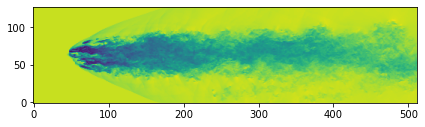

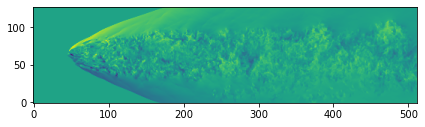

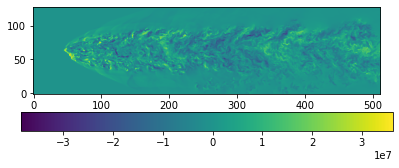

In [133]:
fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,1)
image = plt.imshow(vx_xz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,2)
image = plt.imshow(vy_xz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,3)
image = plt.imshow(vz_xz.T, origin='lower', cmap='viridis')

plt.tight_layout()
plt.savefig('..\Plots\plot6.png', bbox_inches='tight')
cb = plt.colorbar(image, orientation = 'horizontal')

<h2>Density Weighted Slices</h2>

In [121]:
d_avg = np.average(d)

In [122]:
vx_weighted = (vx*d)/d_avg
vy_weighted = (vy*d)/d_avg
vz_weighted = (vz*d)/d_avg

In [123]:
vx_weighted_xy = vx_weighted[int(nx/2),:,:]
vx_weighted_yz = vx_weighted[:,int(ny/2),:]
vx_weighted_xz = vx_weighted[:,:,int(nz/2)]

In [124]:
vy_weighted_xy = vy_weighted[int(nx/2),:,:]
vy_weighted_yz = vy_weighted[:,int(ny/2),:]
vy_weighted_xz = vy_weighted[:,:,int(nz/2)]

In [125]:
vz_weighted_xy = vz_weighted[int(nx/2),:,:]
vz_weighted_yz = vz_weighted[:,int(ny/2),:]
vz_weighted_xz = vz_weighted[:,:,int(nz/2)]

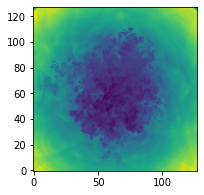

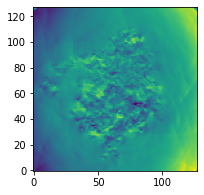

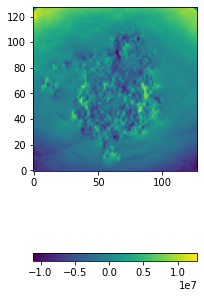

In [134]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
image = plt.imshow(vx_weighted_xy.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,2)
image = plt.imshow(vy_weighted_xy.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,3)
image = plt.imshow(vz_weighted_xy.T, origin='lower', cmap='viridis')

plt.savefig('..\Plots\plot7.png', bbox_inches='tight')
cb = plt.colorbar(image, orientation = 'horizontal')

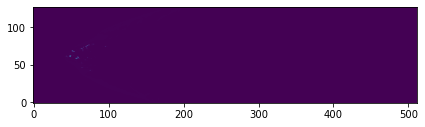

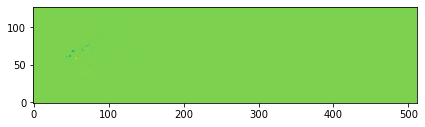

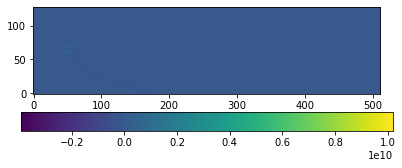

In [135]:
fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,1)
image = plt.imshow(vx_weighted_yz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,2)
image = plt.imshow(vy_weighted_yz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,3)
image = plt.imshow(vz_weighted_yz.T, origin='lower', cmap='viridis')

plt.tight_layout()
plt.savefig('..\Plots\plot8.png', bbox_inches='tight')
cb = plt.colorbar(image, orientation = 'horizontal')

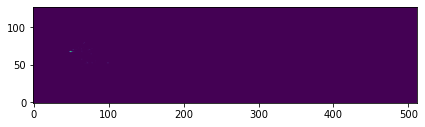

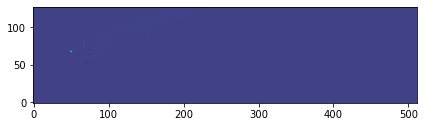

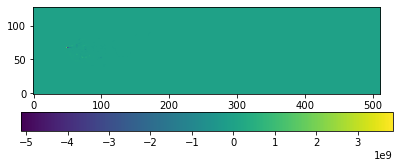

In [136]:
fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,1)
image = plt.imshow(vx_weighted_xz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,2)
image = plt.imshow(vy_weighted_xz.T, origin='lower', cmap='viridis')

fig = plt.figure(figsize=(24,6))
plt.subplot(3,1,3)
image = plt.imshow(vz_weighted_xz.T, origin='lower', cmap='viridis')

plt.tight_layout()
plt.savefig('..\Plots\plot9.png', bbox_inches='tight')
cb = plt.colorbar(image, orientation = 'horizontal')